## Systemer av lineære ordinære differensialligninger

Se avsnitt 3 av kapittel 4 i [kompendiet](https://mitt.uib.no/courses/45603/files?preview=5619281) for mere om dette.

In [1]:
# @title Import av moduler
import numpy as np
import matplotlib.pyplot as plt
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz
# lenke til quizspørsmål
git_path="https://raw.githubusercontent.com/mbr085/V26MAT102/refs/heads/main/notebooks/uke6/"

Her ser vi på systemer av førsteordens differensialligninger på formen
$$\begin{align}
  x'(t) &= f(t,x(t), y(t)), \newline
  y'(t) &= g(t,x(t), y(t))
\end{align}$$
for funksjoner
$$\begin{align}
\mathbb{R}^3 &\xrightarrow f \mathbb{R}, \newline
(t, x, y) &\mapsto f(t, x, y)
\end{align}$$
og
$$\begin{align}
\mathbb{R}^3 &\xrightarrow g \mathbb{R}, \newline
(t, x, y) &\mapsto g(t, x, y).
\end{align}$$

## Eksempel

La $f$ og $g$ være funksjonene

$$
\begin{align}
  f(t, x, y) &= x, \newline
  g(t, x, y) &= 1
\end{align}
$$

og la oss sette startbetingelsene
$$
  x(0) = 2 \quad \text{og} \quad y(0) = 0.
$$

Siden $y'(t) = g(t, x(t), y(t)) = 1$ og $y(0) = 0$ må vi ha $y(t) = t$. (Hvorfor det?)

Nå ser vi da at $f(t, x(t), y(t)) = x(t)$, så
betingelsen på $x(t)$ er at
$$
x'(t) = x(t) \quad \text{og} \quad x(0) = 2.
$$
Denne differensialligningen har vi studert allerede!

In [2]:
display_quiz(git_path+"systemer.json")

<IPython.core.display.Javascript object>

## Eulers metode

Hvis $t_0$ er gitt og vi numerisk vil løse differensialligningen

$$\begin{align}
  x'(t) &= f(t,x(t), y(t)), \newline
  y'(t) &= g(t,x(t), y(y))
\end{align}$$
med
$$x(t_0) = x_0 \quad \text{og} \quad y(t_0) = y_0,$$

da kan vi velge en skrittlengde $\Delta t$, og approksimere $x(t_0 + \Delta t)$ og $y(t_0 + \Delta t)$ med

$$\begin{align}
  x(t_0 + \Delta t) &\approx x_0 + f(t_0, x_0, y_0) \cdot \Delta t \newline
  y(t_0 + \Delta t) &\approx y_0 + g(t_0, x_0, y_0) \cdot \Delta t.
\end{align}$$
Vi setter nå

$$\begin{align}
  x_1 &= x_0 + f(t_0, x_0, y_0) \cdot \Delta t \newline
  y_1 &= y_0 + g(t_0, x_0, y_0) \cdot \Delta t,
\end{align}$$

og $t_1 = t_0 + \Delta t$.
Vi fortsetter på denne måten. Etter å ha funnet $x_0, x_1, \dots, x_n$ og
$y_0, y_1, \dots, y_n$ setter vi

$$\begin{align}
  x_{n+1} &= x_n + f(t_n, x_n, y_n) \cdot \Delta t \newline
  y_{n+1} &= y_n + g(t_n, x_n, y_n) \cdot \Delta t,
\end{align}$$
der $t_n = t_0 + n \Delta t$.

### Illustrasjon

For å illustrere Eulers metode kan vi tenke på
$$(x_0, y_0)$$
som et punkt i planet, og tenke på
$$\vec v_0 = (f(t_n, x_n, y_n) \cdot \Delta t, \ g(t_n, x_n, y_n) \cdot \Delta t)$$
som en vektor ut fra punktet $(x_0, x_0)$.

Punktet $(x_1, y_1)$ er det punktet som vektoren $\vec v_0$ peker på. Vi kan nå fortsette på denne måten.

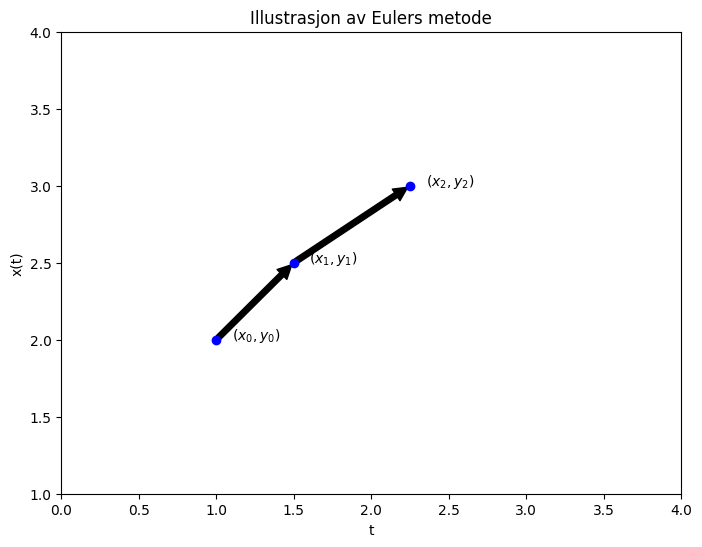

In [3]:
# @title Illustrasjon av Eulers metode
# import matplotlib.pyplot as plt
import matplotlib.patches as patches
# import numpy as np

#velg starttid
t0 = 1

# velg startpunkt
x0 = 1
y0 = 2

# velg steglengde
dt = 0.5

def f(t, x, y):
    return x

def g(t, x, y):
    return 1

v0 = (f(t0, x0, y0)*dt, g(t0, x0, y0)*dt)

x1 = x0 + v0[0]
y1 = y0 + v0[1]
t1 = t0 + dt

v1 = (f(t1, x1, y1)*dt, g(t1, x1, y1)*dt)

x2 = x1 + v1[0]
y2 = y1 + v1[1]
t2 = t1 + dt
# Lag en FancyArrowPatch
plt.figure(figsize=(8,6))
ax = plt.gca()
arrow1 = patches.FancyArrowPatch((x0, y0), (x1, y1),
                                 mutation_scale=20,
                                 #arrowstyle="->",
                                 color="k")
arrow2 = patches.FancyArrowPatch((x1, y1), (x2, y2),
                                 mutation_scale=20,
                                 #arrowstyle="->",
                                 color="k")

# Legg til pilen til plottet
ax.add_patch(arrow1)
ax.add_patch(arrow2)
ax.plot(x0, y0, 'bo')
ax.text(x0 + 0.1, y0, '$(x_0, y_0)$')
ax.plot(x1, y1, 'bo')
ax.text(x1 + 0.1, y1, '$(x_1, y_1)$')
ax.plot(x2, y2, 'bo')
ax.text(x2 + 0.1, y2, '$(x_2, y_2)$')

# Sett grenser for aksene for å vise pilen
ax.set_xlim([0, 4])
ax.set_ylim([1, 4])

# Sett akser og tittel
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title("Illustrasjon av Eulers metode");

## Eksempel

Vi ser på
$$\begin{align}
  x'(t) &= 2tx(t) + y(t), \newline
  y'(t) &= x(t)^{-2} + e^{-t}
\end{align}$$
med startbetingelsene $x(0) = 0.2$ og $y(0) = 1$. Vi vil se på løsningen for $t$ i intervallet $[0, 1]$.

## Funksjon som anvender Eulers metode på et system av differensialligninger

Vi utvider Eulers metode fra før til å kunne løse par av differensialligninger.

In [4]:
import numpy as np

def euler_method(f, g, t0, tn, x0, y0, n):
  """
  Anvender Eulers metode for å løse
    differensialligningen x' = f(t, x, y) og y' = g(t, x, y).

  Args:
    f: Funksjonen som representerer x-delen av høyre side av differensialligningen.
    g: Funksjonen som representerer y-delen av høyre side av differensialligningen.
    t0: Startverdien for t.
    tn: Sluttverdien for t.
    x0: Startverdien for x.
    y0: Startverdien for y.
    n: Antall steg.

  Returns:
    En NumPy array som inneholder de approksimerte verdiene for x i hvert steg,
    En NumPy array som inneholder de approksimerte verdiene for y i hvert steg,
  """

  # Lager en array med t-verdier fra t0 til tn med n+1 punkter
  t_values = np.linspace(t0, tn, n + 1)
  # Initialiserer listene for x- og y-verdiene med startverdiene
  x_values = [x0]

  # linjen under er ny
  y_values = [y0]

  # Beregner steglengden
  delta_t = t_values[1] - t_values[0]

  # Gjennomfører Eulers metode for hvert steg
  for i in range(n):
    # Beregner neste x-verdi
    x_next = x_values[-1] + delta_t * f(t_values[i], x_values[-1], y_values[-1])

    # de to linjene under er nye
    # Beregner neste y-verdi
    y_next = y_values[-1] + delta_t * g(t_values[i], x_values[-1], y_values[-1])

    # Legger til de nye verdiene i listene
    x_values.append(x_next)

    # linjen under er ny
    y_values.append(y_next)

  # Returnerer t-verdiene og de beregnede x- og y-verdiene som NumPy arrays
  return t_values, np.array(x_values), np.array(y_values)

## Spørsmål:

Hva er forskjellen mellom Eulers metode for en ukjent `x` og for to ukjente `x` og `y`?

### Vi anvender den nye Eulers metode funksjonen på vårt eksempel

$$\begin{align}
  x'(t) &= 2tx(t) + y(t), \newline
  y'(t) &= x(t)^{-2} + e^{-t}
\end{align}$$
med startbetingelsene $x(0) = 0.2$ og $y(0) = 1$. Vi vil se på løsningen for $t$ i intervallet $[0, 1]$.

In [5]:
# Forteller python om funksjonene f og g

def f(t, x, y):
  return 2*t*x + y

def g(t, x, y):
  return x**(-2) + np.exp(-t)

In [6]:
# Angir startbetingelser og parametere
t0 = 0   # Starttidspunkt
x0 = 0.2  # Startverdi for x
y0 = 1   # Startverdi for y
tn = 1   # Slutt-tidspunkt
n = 100  # Antall steg i beregningen

# Bruker Eulers metode for å løse differensialligningen
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

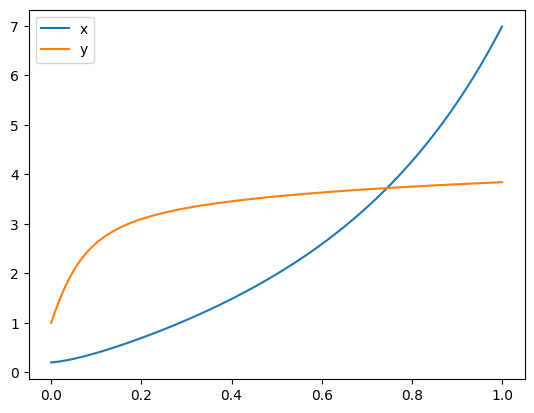

In [7]:
# Plotter x og y
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend();

## Oppgave

**Figuren under kalles et fasediagram. Beskriv i ord hva den forteller om løsningen til systemet av differensialligninger.**

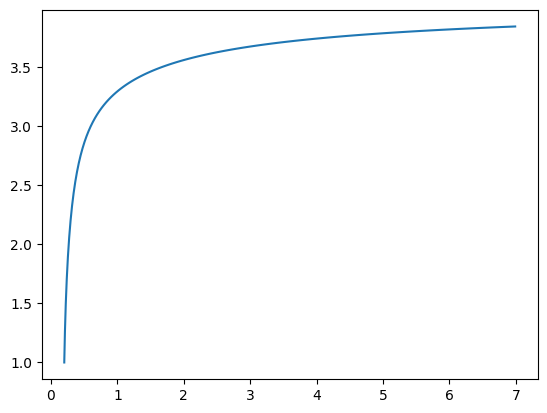

In [8]:
plt.plot(x_values, y_values);

## Oppgave

**Bruk koden over til å plotte løsninger for differensialligningen
$$\begin{align}
  x'(t) &= y(t), \newline
  y'(t) &= -x(t) + y(t)
\end{align}$$
med $x(0) = 1$ og $y(0) = 2$ for $t$-verdier i intervallet $[0, 10]$**

## Oppgave

Regn ut fem steg i Eulers metode i eksemplene over og illustrer stegene med piler som i illustrasjonen av to steg over. Du kan kanskje finne inspirasjon [her](EulerSystemSteg.ipynb).

## Eksempel: [Tømming av sammenkoblede vanntanker](Tømming_av_vanntanker.ipynb)

## Eksempel: [Svingninger](Svingninger.ipynb)

## Løsning av differensialligninger med scipy

Det finnes innebyggede funksjoner i python for å løse differensialligninger. De
bruker metoder som er mere effektive enn Eulers metode. I utgangspunktet bruker de
fjerdeordens Runge Kutta metoden som er beskrevet i kompendiet til MAT 102,
men det er mulig å få dem til å benytte andre metoder. Hva som er best metode avhenger
av hvilken differensialligning vi vil løse.

In [9]:
from scipy.integrate import solve_ivp

In [10]:
# Innfører M, alpha og k fra Svingninger
M = 1
alpha = 0.2
k = 1

In [11]:
# Denne funksjonen passer godt med brukergrensesnittet til solve_ivp
def svingning(t, z, M, alpha):
    x, y = z
    return [y, -(alpha* y + k * x) / M]

In [12]:
sol = solve_ivp(svingning, [0, 20], [1, 0], args=(1, -0.1), dense_output=True)

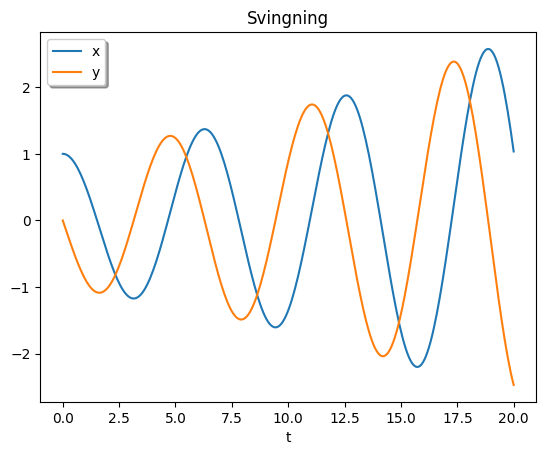

In [13]:
t = np.linspace(0, 20, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Svingning')
plt.show()

## Eksempel:[Lotka-Volterra-modellen for oscillerende kjemiske reaksjoner](LotkaVoltera.ipynb)

# Quiz

Prøv om du kan svare på
[quiz fra eksamen i 2024](https://mitt.uib.no/courses/57503/quizzes/57933).

Advarsel: I quizen er $y = y(x)$ en funksjon av $x$, og ikke av $t$ som hos oss.